In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

In [2]:
data1 = pd.read_csv('student_data1.csv')

In [3]:
data1.head()

,Ash,1,3,4,Male,5
0,Ash,2,2.0,2,Male,5.0
1,Ash,3,2.0,1,Male,5.0
2,Ash,4,6.0,5,Male,5.0
3,Ash,5,2.0,3,Male,5.0
4,Berlin,1,7.0,4,Male,3.0


In [4]:
data1.rename(columns = {'Ash':'student_name', '1':'ques_no',
                              '3':'resp_time_tvar', '4': 'diff_lvl', 'Male': 'gender','5':'prev_gpa'}, inplace = True)

In [5]:
data1.head()#artificial dataset (made the data such that as diff_lvl increases so does the resp_time, usually)

,student_name,ques_no,resp_time_tvar,diff_lvl,gender,prev_gpa
0,Ash,2,2.0,2,Male,5.0
1,Ash,3,2.0,1,Male,5.0
2,Ash,4,6.0,5,Male,5.0
3,Ash,5,2.0,3,Male,5.0
4,Berlin,1,7.0,4,Male,3.0


#### the response time is our target variable. since we're trying to use linear regression the only two independent variables can be diff_lvl (difficulty level) and prev_gpa.

In [10]:
data1.describe()#basic descriptive statistics

,ques_no,resp_time_tvar,diff_lvl,prev_gpa
count,49.000000,49.000000,49.000000,49.000000
mean,3.040816,7.997816,2.979592,5.969388
std,1.413612,4.121075,1.435993,2.976310
min,1.000000,1.500000,1.000000,1.000000
25%,2.000000,5.400000,2.000000,3.000000
50%,3.000000,7.000000,3.000000,7.000000
75%,4.000000,11.000000,4.000000,9.000000
max,5.000000,15.000000,5.000000,10.000000


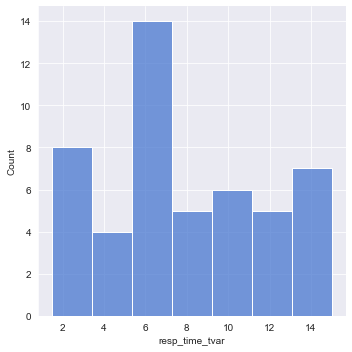

In [22]:
sns.set_palette("muted")
sns.displot(data1['resp_time_tvar'])#not really normal, but will do for now

In [12]:
data1.corr() # correlation b/w variables

,ques_no,resp_time_tvar,diff_lvl,prev_gpa
ques_no,1.000000,0.065052,0.123575,-0.009600
resp_time_tvar,0.065052,1.000000,0.772023,0.102731
diff_lvl,0.123575,0.772023,1.000000,0.004725
prev_gpa,-0.009600,0.102731,0.004725,1.000000


<AxesSubplot:>

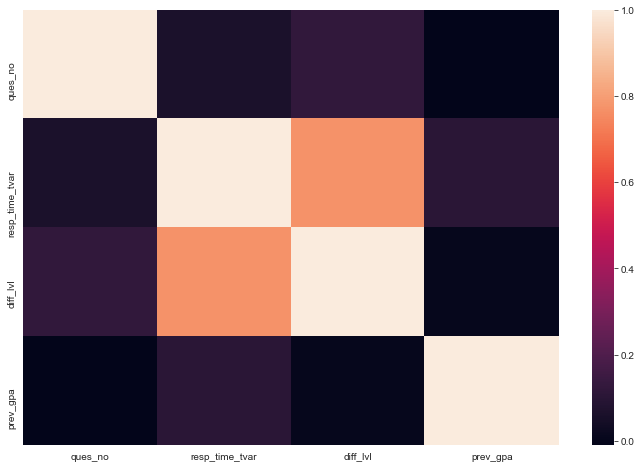

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(), annot=False)

In [14]:
data1.columns

Index(['student_name', 'ques_no', 'resp_time_tvar', 'diff_lvl', 'gender',
       'prev_gpa'],
      dtype='object')

In [15]:
X = data1[['diff_lvl', 'prev_gpa']]
y = data1['resp_time_tvar']

# now we split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
print(lm.intercept_)
print(lm.coef_)

2.713296874543385
[1.88549586 0.0104499 ]


In [17]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [18]:
cdf

,Coeff
diff_lvl,1.885496
prev_gpa,0.010450


In [19]:
# one unit increase in diff_lvl increased the target variable i.e resp time by 1.8 units

### Predictions

In [20]:
predictions = lm.predict(X_test)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resp_time_tvar'>

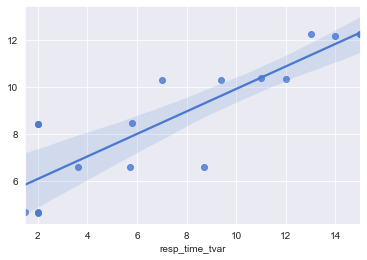

In [23]:
sns.regplot(y_test, predictions)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resp_time_tvar', ylabel='Density'>

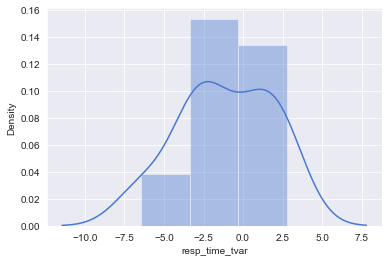

In [24]:
sns.distplot((y_test-predictions)) #normally dist residuals means your model was a correct choice

In [29]:
#performance metrics
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

2.6170788730203216
9.492375863725963
3.080969955018381


In [26]:
data1['resp_time_tvar'].head(10)

0     2.0
1     2.0
2     6.0
3     2.0
4     7.0
5     5.0
6     2.0
7    11.0
8     2.0
9     9.0
Name: resp_time_tvar, dtype: float64

In [30]:
data1['resp_time_tvar'].mean()#average resp_time

7.997816326530611

In [32]:
(3.17/7.99)*100 #%error

39.67459324155194